In [3]:
args_pre = {
    'det_config': 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py',
    'det_checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth',
    'pose_detector_config': 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py',
    'pose_detector_checkpoint': 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth',
    'pose_lifter_config': 'configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/videopose3d_h36m_243frames_fullconv_supervised_cpn_ft.py',
    'pose_lifter_checkpoint': 'https://download.openmmlab.com/mmpose/body3d/videopose/videopose_h36m_243frames_fullconv_supervised_cpn_ft-88f5abbb_20210527.pth',
    # Flags/Optional
#     'video_path': 'demo/resources/jeldwen-1.mp4',
    'rebase_keypoint_height': True,
    'norm_pose_2d': None,
    'num_instances': -1,
    'show': False,
    'out_video_root': 'vis_results',
    'device': 'cuda:0',
    'det_cat_id': 1,
    'bbox_thr': 0.9,
    'kpt_thr': 0.3,
    'use_oks_tracking': None,
    'tracking_thr': 0.3,
    'euro': None,
    'radius': 8,
    'thickness': 2,
}
from types import SimpleNamespace
args = SimpleNamespace(**args_pre)

In [4]:
from demo import zach_v_body3d_two_stage_video as m_2d_3d_model 

In [5]:
# Test one video

# args.video_name = 'AFG_truck_raising'
# args.file_path = 'demo/resources/test_vids/AFG_truck_raising.MOV'
# m_2d_3d_model.process_video(args)

In [6]:
import glob
import re

video_directory = 'evaluation_vids'

def get_video_list():
    '''Get list of videos to process'''
    file_paths = glob.glob("demo/resources/{}/*".format(video_directory))
    video_names = []
    
    for path in file_paths:
        video_names.append(
            SimpleNamespace(
                **{
                    'video_name': re.search('/.*/.*/(.*)(?:[.])', path).group(1),
                    'file_path': 'demo/resources/{}/'.format(video_directory) + re.search('/.*/.*/(.*)', path).group(1)
                }
            )
        )
    
    return video_names


In [7]:
def process_videos():
    '''Iterate through videos and process'''
    video_list = get_video_list()
    print(video_list)
    for video in video_list:
        args.video_name = video.video_name
        args.file_path = video.file_path
        m_2d_3d_model.process_video(args)
        
process_videos()

[namespace(file_path='demo/resources/evaluation_vids/BAR-S_water_ballon_trimmed.mov', video_name='BAR-S_water_ballon_trimmed')]
Stage #1: 2D pose detection.


/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_http loader
person_det_model-> FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=Tru

Use load_from_http loader
Initialized Model
pose_det_dataset-> TopDownCocoDataset
Video len: 1513


/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


Idx: 100
Idx: 200
Idx: 300
Idx: 400
Idx: 500
Idx: 600
Idx: 700
Idx: 800
Idx: 900
Idx: 1000
Idx: 1100
Idx: 1200
Idx: 1300
Idx: 1400
Idx: 1500
Stage 2: 2D-to-3D pose lifting.
Use load_from_http loader
pose_lift_dataset-> Body3DH36MDataset
[                                                  ] 0/1513, elapsed: 0s, ETA:Len 243
[                                                  ] 1/1513, 12.7 task/s, elapsed: 0s, ETA:   119sLen 243
[                                                  ] 2/1513, 12.3 task/s, elapsed: 0s, ETA:   123sLen 243
[                                                  ] 3/1513, 12.6 task/s, elapsed: 0s, ETA:   120sLen 243
[                                                  ] 4/1513, 12.9 task/s, elapsed: 0s, ETA:   117sLen 243
[                                                  ] 5/1513, 14.0 task/s, elapsed: 0s, ETA:   108sLen 243
[                                                  ] 6/1513, 14.3 task/s, elapsed: 0s, ETA:   105sLen 243
[                                        

[>>>>                                              ] 149/1513, 12.3 task/s, elapsed: 12s, ETA:   111sLen 243
[>>>>                                              ] 150/1513, 12.2 task/s, elapsed: 12s, ETA:   112sLen 243
[>>>>                                              ] 151/1513, 12.2 task/s, elapsed: 12s, ETA:   112sLen 243
[>>>>>                                             ] 152/1513, 12.2 task/s, elapsed: 12s, ETA:   112sLen 243
[>>>>>                                             ] 153/1513, 12.2 task/s, elapsed: 13s, ETA:   112sLen 243
[>>>>>                                             ] 154/1513, 12.2 task/s, elapsed: 13s, ETA:   112sLen 243
[>>>>>                                             ] 155/1513, 12.2 task/s, elapsed: 13s, ETA:   112sLen 243
[>>>>>                                             ] 156/1513, 12.2 task/s, elapsed: 13s, ETA:   111sLen 243
[>>>>>                                             ] 157/1513, 12.2 task/s, elapsed: 13s, ETA:   111sLen 243
[>>>>>             

[>>>>>>>>>                                         ] 299/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>                                         ] 300/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>                                         ] 301/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>                                         ] 302/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>>                                        ] 303/1513, 12.5 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 304/1513, 12.6 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 305/1513, 12.6 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 306/1513, 12.5 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 307/1513, 12.5 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>        

[>>>>>>>>>>>>>>                                    ] 449/1513, 14.2 task/s, elapsed: 32s, ETA:    75sLen 243
[>>>>>>>>>>>>>>                                    ] 450/1513, 14.2 task/s, elapsed: 32s, ETA:    75sLen 243
[>>>>>>>>>>>>>>                                    ] 451/1513, 14.2 task/s, elapsed: 32s, ETA:    75sLen 243
[>>>>>>>>>>>>>>                                    ] 452/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>                                    ] 453/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 454/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 455/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 456/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 457/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>   

[>>>>>>>>>>>>>>>>>>>                               ] 599/1513, 13.6 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 600/1513, 13.5 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 601/1513, 13.5 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 602/1513, 13.5 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 603/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 604/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 605/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>>                              ] 606/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>>                              ] 607/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 749/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 750/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 751/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 752/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 753/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 754/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 755/1513, 13.2 task/s, elapsed: 57s, ETA:    57sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 756/1513, 13.2 task/s, elapsed: 57s, ETA:    57sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>                         ] 757/1513, 13.2 task/s, elapsed: 57s, ETA:    57sLen 243
[>>>>>>>>>>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 899/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 900/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 901/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 902/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 903/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 904/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 905/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 906/1513, 13.2 task/s, elapsed: 69s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 907/1513, 13.2 task/s, elapsed: 69s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1048/1513, 13.4 task/s, elapsed: 78s, ETA:    35sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1049/1513, 13.4 task/s, elapsed: 78s, ETA:    35sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1050/1513, 13.4 task/s, elapsed: 78s, ETA:    35sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1051/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1052/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1053/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1054/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1055/1513, 13.4 task/s, elapsed: 79s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1056/1513, 13.4 task/s, elapsed: 79s, ETA:    34sLen 243
[>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1196/1513, 14.1 task/s, elapsed: 85s, ETA:    23sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1197/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1198/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1199/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1200/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1201/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1202/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1203/1513, 14.1 task/s, elapsed: 86s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1204/1513, 14.1 task/s, elapsed: 86s, ETA:    22sLen 243
[>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1344/1513, 14.6 task/s, elapsed: 92s, ETA:    12sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1345/1513, 14.6 task/s, elapsed: 92s, ETA:    12sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1346/1513, 14.6 task/s, elapsed: 92s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1347/1513, 14.6 task/s, elapsed: 92s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1348/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1349/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1350/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1351/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1352/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1492/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1493/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1494/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1495/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1496/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1497/1513, 15.1 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1498/1513, 15.1 task/s, elapsed: 100s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1499/1513, 15.1 task/s, elapsed: 100s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1500/1513, 15.1 task/s, elapsed: 100s, ETA:     1sLen 243
[>>>>>>

In [171]:
# Test loading pickeled keypoints
import pickle
with open ('work_dirs/tumeke_testing/pickle_files/BAR-S_water_ballon_trimmed.p', 'rb') as fp:
    raw_data = pickle.load(fp)

'''Load picked data into numpy.
    
Bounding box values are: 'xyxy' = (left, top, right, bottom)

Key Point values are: (ndarray[Kx3]): x, y, score

'''    

raw_data

[[],
 [{'bbox': array([ 457.963,  383.015,  567.603,  707.420,  0.998], dtype=float32),
   'keypoints': array([[ 508.517,  417.017,  0.942],
          [ 514.872,  410.661,  0.957],
          [ 502.161,  410.661,  0.940],
          [ 527.583,  413.839,  0.934],
          [ 495.805,  413.839,  0.912],
          [ 546.650,  451.973,  0.890],
          [ 483.094,  455.150,  0.884],
          [ 556.183,  502.817,  0.860],
          [ 470.383,  502.817,  0.867],
          [ 553.006,  550.484,  0.877],
          [ 467.205,  544.128,  0.875],
          [ 527.583,  553.662,  0.804],
          [ 489.450,  553.662,  0.812],
          [ 524.406,  610.862,  0.829],
          [ 495.805,  610.862,  0.799],
          [ 521.228,  677.595,  0.863],
          [ 505.339,  664.884,  0.787]], dtype=float32),
   'area': 10479.031,
   'track_id': 0},
  {'bbox': array([ 568.928,  363.548,  696.147,  743.428,  0.991], dtype=float32),
   'keypoints': array([[ 634.897,  418.225,  0.856],
          [ 646.056,  410

In [172]:
#Just focus on videos with one subject for now

raw_data[1]

[{'bbox': array([ 457.963,  383.015,  567.603,  707.420,  0.998], dtype=float32),
  'keypoints': array([[ 508.517,  417.017,  0.942],
         [ 514.872,  410.661,  0.957],
         [ 502.161,  410.661,  0.940],
         [ 527.583,  413.839,  0.934],
         [ 495.805,  413.839,  0.912],
         [ 546.650,  451.973,  0.890],
         [ 483.094,  455.150,  0.884],
         [ 556.183,  502.817,  0.860],
         [ 470.383,  502.817,  0.867],
         [ 553.006,  550.484,  0.877],
         [ 467.205,  544.128,  0.875],
         [ 527.583,  553.662,  0.804],
         [ 489.450,  553.662,  0.812],
         [ 524.406,  610.862,  0.829],
         [ 495.805,  610.862,  0.799],
         [ 521.228,  677.595,  0.863],
         [ 505.339,  664.884,  0.787]], dtype=float32),
  'area': 10479.031,
  'track_id': 0},
 {'bbox': array([ 568.928,  363.548,  696.147,  743.428,  0.991], dtype=float32),
  'keypoints': array([[ 634.897,  418.225,  0.856],
         [ 646.056,  410.786,  0.869],
         [ 63

In [173]:
# View histogram of subjects per frame
# subjects = [len(i) for i in raw_data]
# plt.hist(subjects, bins=200)

In [174]:
import numpy as np
import pandas as pd
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

joint_order = [
    'root', # Not in data studio
    'R_Hip',
    'R_Knee',
    'R_Ankle',
    'L_Hip',
    'L_Knee',
    'L_Ankle',
    'spine', # Not in data studio
    'thorax', # Not in data studio
    'Neck',
    'Nose', # Actually supposed to be "Head"
    'L_Shoulder',
    'L_Elbow',
    'L_Wrist',
    'R_Wrist',
    'R_Elbow',
    'R_Shoulder',
]

# def index_of(val, in_list):
#     try:
#         return in_list.index(val)
#     except ValueError:
#         return -1 

def pull_from_dict(key, dict):
    try:
        return dict[key]
    except (KeyError, TypeError):
        if key == 'bbox':
            return np.full(5,np.NaN)
        else:
            return np.NaN

def extract_subject(subject_num, subjects):
    try:
        return subjects[subject_num-1]
    except IndexError:
        return None 

def raw_data_to_dataframe(raw_data):
    """ Load into dataframe"""

    # Get first identified subject in every frame
    first_subj = np.array([extract_subject(1, i) for i in raw_data])

    # Extract relevant fields to be set as columns
    bbox = np.array([pull_from_dict('bbox', i) for i in first_subj])
    area = np.array([pull_from_dict('area', i) for i in first_subj])
    track_id = np.array([pull_from_dict('track_id', i) for i in first_subj])

    # Structure Keypoints
    keypoints_array = []
    for frame in first_subj:
        
        #TODO(znoland):sanity check this and make sure no issues!
        # Keypoint order! - configs/_base_/datasets/h36m.py
        if not frame:
            # If no data for subject
            frame_keypoints = {}
            for index in range(17):
                frame_keypoints['j{}_x'.format(index)] = np.NaN
                frame_keypoints['j{}_y'.format(index)] = np.NaN
                frame_keypoints['j{}_score'.format(index)] = np.NaN
                frame_keypoints['j{}_l'.format(index)] = joint_order[index]
            keypoints_array.append(frame_keypoints)
            
        else:
            # If data for subject
            frame_keypoints = {}
            for index, keypoint in enumerate(frame['keypoints']):
                frame_keypoints['j{}_x'.format(index)] = keypoint[0]
                frame_keypoints['j{}_y'.format(index)] = keypoint[1]
                frame_keypoints['j{}_score'.format(index)] = keypoint[2]
                frame_keypoints['j{}_l'.format(index)] = joint_order[index]
            keypoints_array.append(frame_keypoints)

    # Create seperate dataframes (otherwise can't combine as >1-dimensional fields in pandas or numpy)
    bbox_s = pd.DataFrame(bbox, columns=['bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom', 'bbox_score'])
    area_s = pd.DataFrame(area, columns=['area'])
    track_id_s = pd.DataFrame(track_id, columns=['track_id'])
    keypoints_s = pd.DataFrame(keypoints_array)


    # Create combined DataFrame
    df = pd.concat([bbox_s,area_s,track_id_s,keypoints_s], axis=1)

    return df

    #TODO(znoland): Set index as a frame number column (e.g. video1_frame_num)
    #TODO(znoland): Add column with the name of the video?

    
df = raw_data_to_dataframe(raw_data)
df

,bbox_left,bbox_top,bbox_right,bbox_bottom,bbox_score,area,track_id,j0_x,j0_y,j0_score,j0_l,j1_x,j1_y,j1_score,j1_l,j2_x,j2_y,j2_score,j2_l,j3_x,j3_y,j3_score,j3_l,j4_x,j4_y,j4_score,j4_l,j5_x,j5_y,j5_score,j5_l,j6_x,j6_y,j6_score,j6_l,j7_x,j7_y,j7_score,j7_l,j8_x,j8_y,j8_score,j8_l,j9_x,j9_y,j9_score,j9_l,j10_x,j10_y,j10_score,j10_l,j11_x,j11_y,j11_score,j11_l,j12_x,j12_y,j12_score,j12_l,j13_x,j13_y,j13_score,j13_l,j14_x,j14_y,j14_score,j14_l,j15_x,j15_y,j15_score,j15_l,j16_x,j16_y,j16_score,j16_l
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,root,NaN,NaN,NaN,R_Hip,NaN,NaN,NaN,R_Knee,NaN,NaN,NaN,R_Ankle,NaN,NaN,NaN,L_Hip,NaN,NaN,NaN,L_Knee,NaN,NaN,NaN,L_Ankle,NaN,NaN,NaN,spine,NaN,NaN,NaN,thorax,NaN,NaN,NaN,Neck,NaN,NaN,NaN,Nose,NaN,NaN,NaN,L_Shoulder,NaN,NaN,NaN,L_Elbow,NaN,NaN,NaN,L_Wrist,NaN,NaN,NaN,R_Wrist,NaN,NaN,NaN,R_Elbow,NaN,NaN,NaN,R_Shoulder
1,457.963104,383.014526,567.603455,707.419739,0.997638,10479.031250,0.0,508.516602,417.016907,0.942091,root,514.872131,410.661316,0.956587,R_Hip,502.161011,410.661316,0.940190,R_Knee,527.583313,413.839111,0.934284,R_Ankle,495.805420,413.839111,0.912120,L_Hip,546.650024,451.972534,0.889983,L_Knee,483.094299,455.150330,0.883577,L_Ankle,556.183350,502.817078,0.860337,spine,470.383179,502.817078,0.867292,thorax,553.005554,550.483826,0.877349,Neck,467.205383,544.128296,0.875259,Nose,527.583313,553.661621,0.803832,L_Shoulder,489.449890,553.661621,0.812393,L_Elbow,524.405518,610.861755,0.829235,L_Wrist,495.805420,610.861755,0.799442,R_Wrist,521.227722,677.595276,0.862940,R_Elbow,505.338806,664.884094,0.786970,R_Shoulder
2,454.518127,380.536011,565.770996,708.527039,0.997801,10561.394531,0.0,505.825378,418.125793,0.910649,root,512.250977,411.700195,0.915754,R_Hip,499.399780,411.700195,0.920361,R_Knee,525.102173,411.700195,0.904023,R_Ankle,492.974182,414.912964,0.898498,L_Hip,544.379028,453.466614,0.915285,L_Knee,483.335754,456.679443,0.896535,L_Ankle,550.804626,504.871460,0.874510,spine,470.484558,504.871460,0.883337,thorax,550.804626,549.850708,0.890740,Neck,467.271729,543.425110,0.885310,Nose,525.102173,556.276306,0.816293,L_Shoulder,489.761353,556.276306,0.791000,L_Elbow,521.889404,614.106750,0.830067,L_Wrist,496.186951,610.893921,0.787513,R_Wrist,518.676575,675.150024,0.851262,R_Elbow,502.612549,665.511597,0.831765,R_Shoulder
3,453.765900,377.011139,562.020203,708.985168,0.996972,11280.260742,0.0,503.515533,418.307739,0.943230,root,510.018890,411.804321,0.936382,R_Hip,497.012115,411.804321,0.929172,R_Knee,523.025757,411.804321,0.928710,R_Ankle,490.508698,415.056030,0.925097,L_Hip,542.535889,454.076416,0.912946,L_Knee,480.753632,454.076416,0.890335,L_Ankle,549.039307,506.103638,0.880518,spine,467.746796,506.103638,0.889963,thorax,545.787598,548.375732,0.909123,Neck,464.495148,548.375732,0.876372,Nose,523.025757,558.130798,0.819738,L_Shoulder,487.257050,558.130798,0.795937,L_Elbow,516.522339,616.661377,0.792149,L_Wrist,487.257050,613.409668,0.737120,R_Wrist,516.522339,678.443726,0.820274,R_Elbow,500.263824,671.940308,0.664261,R_Shoulder
4,452.860504,377.732880,560.909485,710.971497,0.997006,11273.802734,0.0,502.488953,419.186310,0.922338,root,509.017029,412.658173,0.918977,R_Hip,495.960815,409.394135,0.919340,R_Knee,522.073242,412.658173,0.908602,R_Ankle,489.432739,412.658173,0.919103,L_Hip,538.393494,451.826752,0.904315,L_Knee,476.376526,455.090851,0.896351,L_Ankle,548.185608,504.051544,0.897436,spine,463.320312,504.051544,0.879880,thorax,544.921570,549.748291,0.878124,Neck,463.320312,546.484131,0.870654,Nose,518.809143,559.540405,0.797989,L_Shoulder,482.904602,559.540405,0.779457,L_Elbow,515.545105,621.557251,0.810252,L_Wrist,479.640564,621.557251,0.637525,R_Wrist,512.281067,680.310181,0.726733,R_Elbow,473.112488,683.574219,0.519450,R_Shoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [175]:
# Create column names
score_column_names = ['bbox_score']
for i in range(17):
    score_column_names.append('j{}_score'.format(i))

pd.DataFrame(df[score_column_names].median()).T

,bbox_score,j0_score,j1_score,j2_score,j3_score,j4_score,j5_score,j6_score,j7_score,j8_score,j9_score,j10_score,j11_score,j12_score,j13_score,j14_score,j15_score,j16_score
0,0.990627,0.869552,0.869326,0.880767,0.883417,0.851,0.829606,0.866831,0.642145,0.823406,0.508941,0.780644,0.688086,0.715854,0.715834,0.693801,0.723737,0.717869


### Visualize Scores - Hist

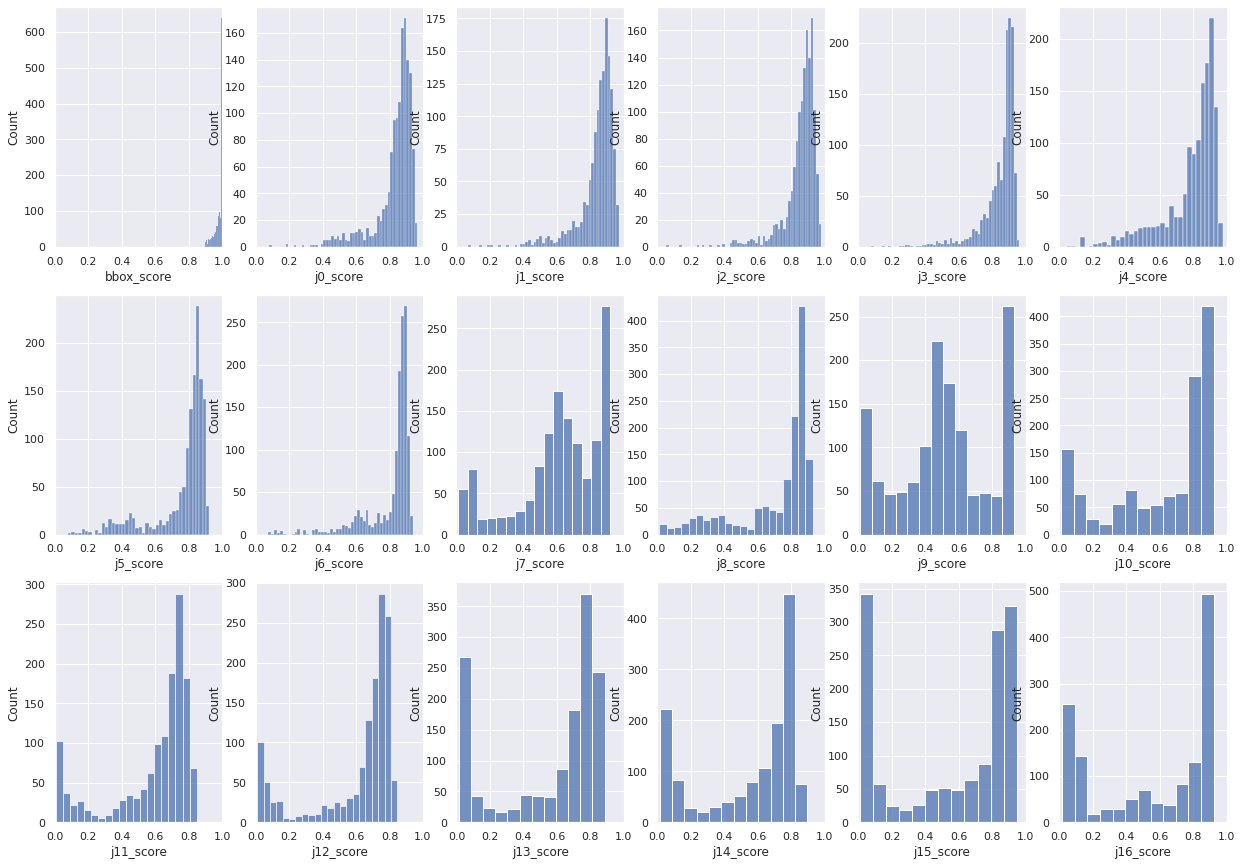

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()
sns.set(rc={'figure.figsize':(21,15)})

import matplotlib.pyplot as plt
n_rows=3
n_cols=6
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

# Set x axis limit (keep all charts on same axis)
for row in axes:
    for chart in row:
        chart.set_xlim(0,1) 

for i, column in enumerate(df[score_column_names].columns):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])

In [8]:
def euclidean_dist(p1, p2):
    # Euclidean distance
    return np.linalg.norm(p1 - p2)


In [9]:
# # initializing points in
# # numpy arrays
# point1 = np.array((1, 2))
# point2 = np.array((2, 4))
 
# # calculating Euclidean distance
# # using linalg.norm()
# dist = np.linalg.norm(point1 - point2)
# dist

In [10]:
def f2d_skeleton_smoothness(df):
    ''' Get Euclidean distance '''
    
    # Build dict to accumulate calcs
    dict_2d_smth = {}
    for j in range(17):
            joint_field = 'j{}_euc_dist'.format(j)
            dict_2d_smth[joint_field] = []

    # Iterate through rows (Standard shift(-1) can't be used with this calc, so must iterate)
    for i in range(len(df)):
        for j in range(17):
            joint_field_x = 'j{}_x'.format(j)
            joint_field_y = 'j{}_y'.format(j)
            joint_field_score = 'j{}_score'.format(j)
            
            #TODO(znoland): return NaN when score below certain amount?
            
            try:
                dict_2d_smth['j{}_euc_dist'.format(j)].append(
                    euclidean_dist(
                        np.array([df.loc[i, joint_field_x], df.loc[i, joint_field_y]]), 
                        np.array([df.loc[i+1, joint_field_x], df.loc[i+1, joint_field_y]])
                    )
                )
            except:
                print('skiped row {}'.format(i))

    return pd.DataFrame(dict_2d_smth)

df_2d_smth = f2d_skeleton_smoothness(df)
df_2d_smth


skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512
skiped row 1512


,j0_euc_dist,j1_euc_dist,j2_euc_dist,j3_euc_dist,j4_euc_dist,j5_euc_dist,j6_euc_dist,j7_euc_dist,j8_euc_dist,j9_euc_dist,j10_euc_dist,j11_euc_dist,j12_euc_dist,j13_euc_dist,j14_euc_dist,j15_euc_dist,j16_euc_dist
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.910724,2.819525,2.950197,3.275823,3.028047,2.718400,1.548060,5.757703,2.056882,2.290179,0.706309,3.604530,2.633170,4.106193,0.382884,3.533781,2.797541
2,2.317000,2.234514,2.389934,2.079025,2.469632,1.941397,3.666485,2.152816,3.002267,5.229353,5.676096,2.783998,3.116196,5.944031,9.277506,3.935632,6.844328
3,1.351205,1.316354,2.629493,1.279197,2.628195,4.713855,4.493121,2.222586,4.879020,1.622936,2.226745,4.445990,4.575018,4.992451,11.153204,4.633794,29.538838
4,1.841408,1.791571,3.026024,1.608639,3.130941,1.133846,2.117314,1.151687,3.544500,2.191389,2.230502,2.288922,2.687331,2.929113,1.484779,12.991746,38.178098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,2.845153,3.048694,5.186000,4.525528,4.743486,8.499605,1.312907,3.014531,6.220628,7.601390,9.382360,3.377840,0.845175,6.289346,4.652228,3.149798,4.605524
1508,3.734294,3.456377,6.231046,3.220528,4.349450,13.463238,5.349559,5.233602,5.481369,6.498840,9.905408,6.678046,7.327742,4.170675,6.036898,24.107388,13.262175
1509,4.655304,1.155224,5.884730,1.855852,7.645728,1.013615,5.787905,15.172986,8.754535,79.790570,6.746656,7.960977,7.071694,11.864516,11.396732,13.250777,14.312785
1510,4.033112,2.300476,3.869096,7.396651,7.819397,7.680758,7.258153,8.531814,7.760241,14.487568,7.672238,9.983143,9.113688,14.243571,19.635175,44.482940,30.235932


### Visualize Sample Euclidean Distance - Hist

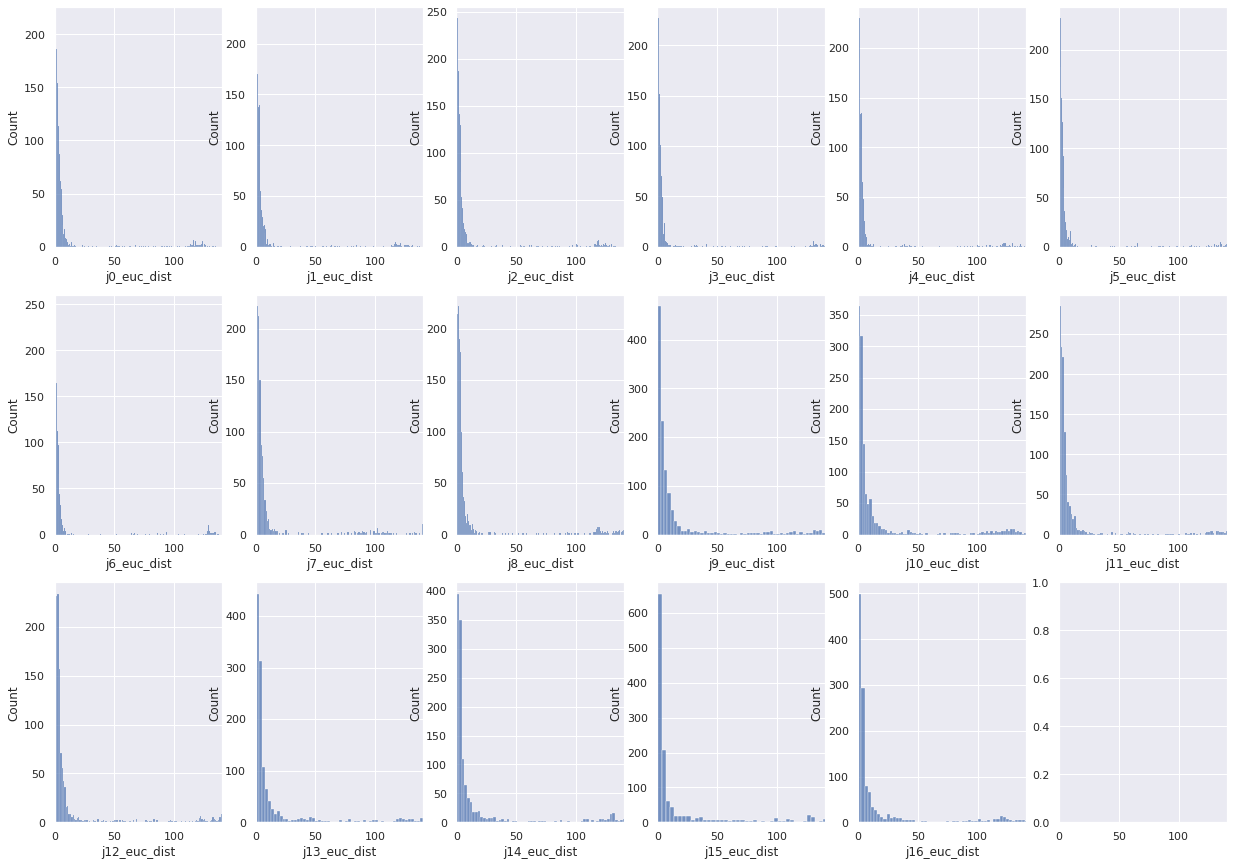

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()
sns.set(rc={'figure.figsize':(21,15)})

# df_2d_smth.j0_euc_dist.hist()
# sns.histplot(df_2d_smth).show()
    
import matplotlib.pyplot as plt
n_rows=3
n_cols=6
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

# Set x axis limit (keep all charts on same axis)
for row in axes:
    for chart in row:
        chart.set_xlim(0,df_2d_smth.quantile(0.90).max()) # df_2d_smth.max().max()

for i, column in enumerate(df_2d_smth.columns):
    sns.histplot(df_2d_smth[column],ax=axes[i//n_cols,i%n_cols])


## Load example ground truth video

In [150]:
import json

with open('work_dirs/tumeke_testing/ground_truth_labels/BAR-S_water_ballon.json') as f:
  labels = json.load(f)

In [151]:
len(labels)

756

In [152]:
labels[0]

{'img': 's3://pose-estimation-image/BAR-S_water_ballon/00001274.jpg',
 'id': 3343,
 'rectangle-label': [{'x': 9.166666666666682,
   'y': 24.74717974662773,
   'width': 46.43111970689559,
   'height': 52.7753770351409,
   'rotation': 0,
   'rectanglelabels': ['Person_1'],
   'original_width': 720,
   'original_height': 1280}],
 'pose-keypoints': [{'x': 30.82151386472911,
   'y': 61.136977672576904,
   'width': 0.3824,
   'keypointlabels': ['R_Ankle'],
   'original_width': 720,
   'original_height': 1280},
  {'x': 30.4734506209691,
   'y': 56.00995063781738,
   'width': 0.3824,
   'keypointlabels': ['R_Knee'],
   'original_width': 720,
   'original_height': 1280},
  {'x': 31.551820304658627,
   'y': 49.5053493976593,
   'width': 0.3824,
   'keypointlabels': ['R_Hip'],
   'original_width': 720,
   'original_height': 1280},
  {'x': 40.04997213681536,
   'y': 49.27706003189087,
   'width': 0.3824,
   'keypointlabels': ['L_Hip'],
   'original_width': 720,
   'original_height': 1280},
  {'x':

In [153]:
# test = pd.DataFrame(labels[0]['pose-keypoints'])

# test['x_px'] = (test['x']) / 100.0 * test['original_width']
# test['y_px'] = (test['y']) / 100.0 * test['original_height']

# test

In [154]:
# from matplotlib.pyplot import figure
# import matplotlib.image as mpimg 
# from scipy import ndimage

# img = mpimg.imread('work_dirs/tumeke_testing/ground_truth_images/BAR-S_water_ballon/00001274.jpg')
# sns.scatterplot(data=test, x="x_px", y="y_px")
# # ax.invert_yaxis()
# # width_perc = 720 / 1280
# # plt.rcParams["figure.figsize"] = (10 * width_perc, 10)
# # plt.xlim(0, 720)
# # plt.ylim(0, 1280)
# plt.imshow(img)
# plt.show()

## Structure ground truth data

In [155]:
# img, id, keypoints (j0_x, j0_y)

# 1) loop through each frame
# 2) take the first person (wait till we have the relationships)
# 3) pivot into dataframe like previous function for ETL

In [156]:
labels[0:2]

[{'img': 's3://pose-estimation-image/BAR-S_water_ballon/00001274.jpg',
  'id': 3343,
  'rectangle-label': [{'x': 9.166666666666682,
    'y': 24.74717974662773,
    'width': 46.43111970689559,
    'height': 52.7753770351409,
    'rotation': 0,
    'rectanglelabels': ['Person_1'],
    'original_width': 720,
    'original_height': 1280}],
  'pose-keypoints': [{'x': 30.82151386472911,
    'y': 61.136977672576904,
    'width': 0.3824,
    'keypointlabels': ['R_Ankle'],
    'original_width': 720,
    'original_height': 1280},
   {'x': 30.4734506209691,
    'y': 56.00995063781738,
    'width': 0.3824,
    'keypointlabels': ['R_Knee'],
    'original_width': 720,
    'original_height': 1280},
   {'x': 31.551820304658627,
    'y': 49.5053493976593,
    'width': 0.3824,
    'keypointlabels': ['R_Hip'],
    'original_width': 720,
    'original_height': 1280},
   {'x': 40.04997213681536,
    'y': 49.27706003189087,
    'width': 0.3824,
    'keypointlabels': ['L_Hip'],
    'original_width': 720,
   

In [157]:
import re

joint_order = [
#     'root', # Not in dataset
    'R_Hip',
    'R_Knee',
    'R_Ankle',
    'L_Hip',
    'L_Knee',
    'L_Ankle',
#     'spine', # not in dataset
#     'thorax', # not in dataset
    'Neck',
    'Nose', # Actually supposed to be "Head"
    'L_Shoulder',
    'L_Elbow',
    'L_Wrist',
    'R_Wrist',
    'R_Elbow',
    'R_Shoulder',
]

def ground_truth_etl(labels):
    '''Tranform ground truth data into data frame'''
    frame_array = []
    for label in labels:
        row = {}
        img_name = re.search(r'(\d\d+)', label['img']).group(0)
        row['id'] = img_name
        row['ls_id'] = label['id']
        row['img'] = label['img']
        
        # Filter out unused keypoints
        label['pose-keypoints'] = [keypoint for keypoint in label['pose-keypoints'] if keypoint['keypointlabels'][0] in joint_order]
        # Set order of keypoints
        label['pose-keypoints'].sort(key=lambda x: joint_order.index(x['keypointlabels'][0]))

        for index, keypoint in enumerate(label['pose-keypoints']):
            if len(keypoint['keypointlabels']) > 1:
                raise ValueError('There are multiple labels for one keypoint!') 
            row['j{}_x'.format(index)] = keypoint['x'] / 100.0 * keypoint['original_width']
            row['j{}_y'.format(index)] = keypoint['y'] / 100.0 * keypoint['original_height']
            row['j{}_l'.format(index)] = keypoint['keypointlabels'][0]

        frame_array.append(row)
        
    return pd.DataFrame(frame_array)
        
gt_df = ground_truth_etl(labels)
# Order by ID
gt_df = gt_df.sort_values(by='id')
gt_df = gt_df.reset_index(drop=True)

In [161]:
#NOTE: IT APPEARS AS IF A ROW IS NOT RETURNED WHEN a frame is not labeled!!!

pd.set_option("display.max_columns", None)
gt_df

,id,ls_id,img,j0_x,j0_y,j0_l,j1_x,j1_y,j1_l,j2_x,j2_y,j2_l,j3_x,j3_y,j3_l,j4_x,j4_y,j4_l,j5_x,j5_y,j5_l,j6_x,j6_y,j6_l,j7_x,j7_y,j7_l,j8_x,j8_y,j8_l,j9_x,j9_y,j9_l,j10_x,j10_y,j10_l,j11_x,j11_y,j11_l,j12_x,j12_y,j12_l,j13_x,j13_y,j13_l
0,00000002,2707,s3://pose-estimation-image/BAR-S_water_ballon/...,342.008944,620.157356,R_Hip,334.996611,701.381989,R_Knee,329.826272,793.271179,R_Ankle,411.087198,622.997093,L_Hip,424.274452,707.871429,L_Knee,422.171091,794.963593,L_Ankle,375.159545,482.956497,Neck,385.129842,452.063301,Nose,424.726038,493.892021,L_Shoulder,427.633080,581.993942,L_Elbow,422.325909,632.152298,L_Wrist,253.791668,521.346474,R_Wrist,306.225615,557.187424,R_Elbow,325.597193,485.951004,R_Shoulder
1,00000004,2708,s3://pose-estimation-image/BAR-S_water_ballon/...,342.008944,620.157356,R_Hip,334.996611,701.381989,R_Knee,329.826272,793.271179,R_Ankle,411.087198,622.997093,L_Hip,424.274452,707.871429,L_Knee,422.171091,794.963593,L_Ankle,375.159545,482.956497,Neck,385.129842,452.063301,Nose,424.726038,493.892021,L_Shoulder,427.633080,581.993942,L_Elbow,425.325909,635.152298,L_Wrist,250.791668,533.346474,R_Wrist,306.225615,557.187424,R_Elbow,325.597193,485.951004,R_Shoulder
2,00000006,2709,s3://pose-estimation-image/BAR-S_water_ballon/...,342.008944,620.157356,R_Hip,338.996611,701.381989,R_Knee,342.826272,793.271179,R_Ankle,411.087198,622.997093,L_Hip,430.274452,707.871429,L_Knee,433.171091,802.963593,L_Ankle,375.159545,482.956497,Neck,385.129842,452.063301,Nose,429.726038,494.892021,L_Shoulder,433.633080,591.993942,L_Elbow,425.325909,635.152298,L_Wrist,250.791668,533.346474,R_Wrist,306.225615,557.187424,R_Elbow,325.597193,485.951004,R_Shoulder
3,00000008,2710,s3://pose-estimation-image/BAR-S_water_ballon/...,351.008944,621.157356,R_Hip,352.996611,705.381989,R_Knee,346.826272,792.271179,R_Ankle,418.087198,623.997093,L_Hip,443.274452,710.871429,L_Knee,444.171091,795.963593,L_Ankle,380.159545,482.956497,Neck,394.129842,461.063301,Nose,434.726038,499.892021,L_Shoulder,440.633080,592.993942,L_Elbow,425.325909,635.152298,L_Wrist,250.791668,533.346474,R_Wrist,308.225615,563.187424,R_Elbow,335.597193,488.951004,R_Shoulder
4,00000010,2711,s3://pose-estimation-image/BAR-S_water_ballon/...,356.008944,621.157356,R_Hip,356.996611,709.381989,R_Knee,351.826272,793.271179,R_Ankle,426.087198,625.997093,L_Hip,446.274452,712.871429,L_Knee,453.171091,798.963593,L_Ankle,394.159545,484.956497,Neck,406.129842,465.063301,Nose,434.726038,499.892021,L_Shoulder,449.633080,604.993942,L_Elbow,440.325909,642.152298,L_Wrist,257.791668,549.346474,R_Wrist,326.225615,565.187424,R_Elbow,344.597193,490.951004,R_Shoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,00001504,3458,s3://pose-estimation-image/BAR-S_water_ballon/...,399.173106,648.668472,R_Hip,396.408844,737.927368,R_Knee,398.914900,816.553314,R_Ankle,487.359799,658.746368,L_Hip,475.181499,746.301453,L_Knee,467.759728,828.267761,L_Ankle,494.566929,473.082886,Neck,537.578266,428.387260,Nose,536.733518,497.441765,L_Shoulder,560.741435,625.403580,L_Elbow,589.328889,587.509262,L_Wrist,548.490623,552.816895,R_Wrist,417.317319,561.765900,R_Elbow,426.990942,468.729103,R_Shoulder
752,00001506,3459,s3://pose-estimation-image/BAR-S_water_ballon/...,399.173106,648.668472,R_Hip,396.408844,737.927368,R_Knee,398.914900,816.553314,R_Ankle,487.359799,658.746368,L_Hip,475.181499,746.301453,L_Knee,467.759728,828.267761,L_Ankle,499.566929,475.082886,Neck,537.578266,428.387260,Nose,536.733518,497.441765,L_Shoulder,552.741435,593.403580,L_Elbow,585.328889,613.509262,L_Wrist,559.490623,554.816895,R_Wrist,436.317319,560.765900,R_Elbow,436.990942,473.729103,R_Shoulder
753,00001508,3460,s3://pose-estimation-image/BAR-S_water_ballon/...,399.173106,648.668472,R_Hip,396.408844,737.927368,R_Knee,398.914900,816.553314,R_Ankle,493.359799,659.746368,L_Hip,475.181499,746.301453,L_Knee,467.

In [166]:
from matplotlib.pyplot import figure
import matplotlib.image as mpimg 
from scipy import ndimage
import re

def visualize_gt_frame(frame_row):
    img_name = re.search(r'(\d+[.][jpg]+)', frame_row['img'].values[0]).group(0)
    img = mpimg.imread('work_dirs/tumeke_testing/ground_truth_images/BAR-S_water_ballon/{}'.format(img_name))
    for j in range(14): # 19 originally
        x = "j{}_x".format(j)
        y = "j{}_y".format(j)
        l = "j{}_l".format(j)
        p1 = sns.scatterplot(data=frame_row, x=x, y=y)
        # Add text besides each point
        p1.text(frame_row[x]+10, frame_row[y], 
             frame_row[l].values[0], horizontalalignment='left', 
             size=7, color='white', weight='regular')
    plt.imshow(img)
    plt.show()

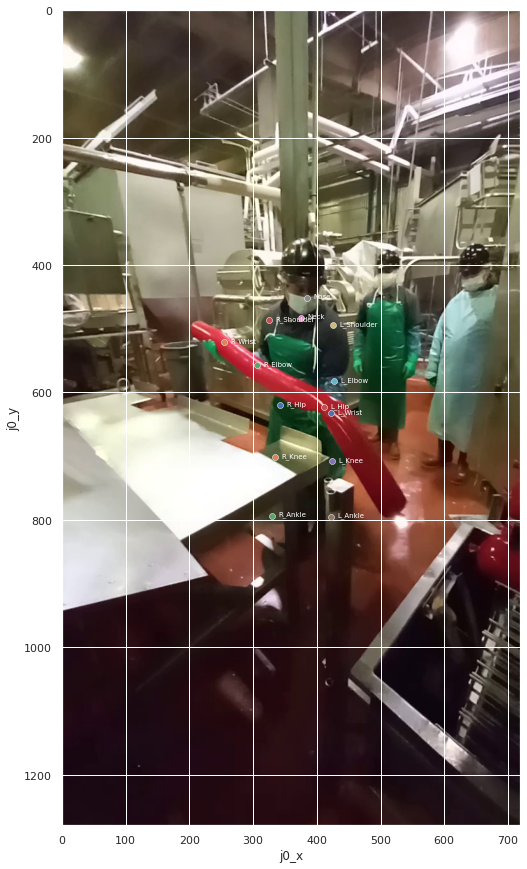

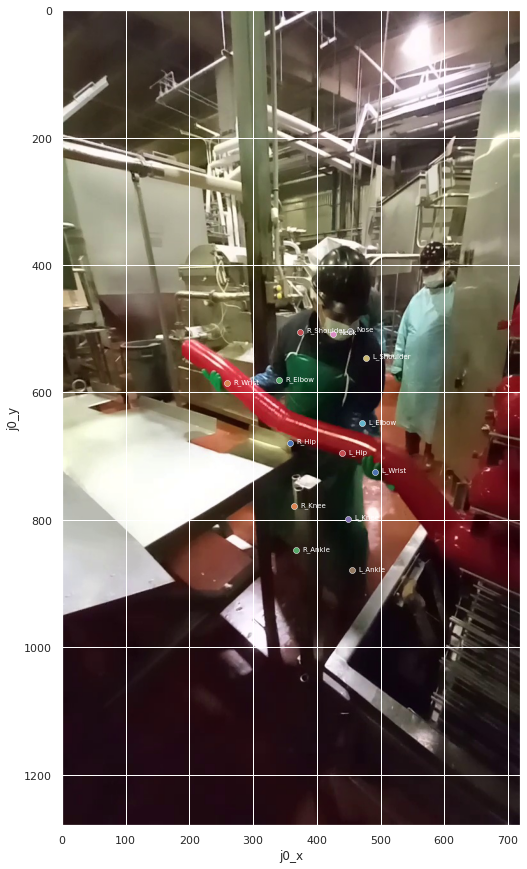

In [168]:
visualize_gt_frame(gt_df[0:1])
visualize_gt_frame(gt_df[20:21])

In [ ]:
gt_df[0:10].img.values # 1 indexed - The frame number is the image name

In [ ]:
# Overlay Hrnet overlays ontop of  ground truth -- take every other frame from HRnet

In [ ]:
#TODO(znoland): Verify that the frames are every other!!

In [ ]:
df

In [53]:
len(['1']) > 1

False